## clustering_examples in python

Herein, kmeans, optics and DBSCAN are attempt to recognize 6 distributions.  These are globular and well seperated.  kmeans can perform well on these types of distributions unlike the concentric in the other example.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn import metrics
%matplotlib inline

In [2]:
# Yes, I know, there are utilities to do this.  

# for a numeric field in a df, determine a smooth rgb distibution
# such that 
# min(df[label_field]) is green
# average( df[label_field]) is red
# max(df[label_field]) is blue
#
# return list of rgb tuples 
def colorByNumericLabel(df,label_field):
    def mkcolor(mn,mx,shift,value):
        value = float(value) + float(shift)
        mdp = (float(mx) - float(mn)) / 2.00
        r,g,b = 0.0, 0.0, 0.0
        if value < mdp:
            # green --> red scale section
            g = (mdp-value)/mdp
            r = 1.00 - g
        else:
            # red --> blue scale section
            r = 1.00 - (value-mdp)/mdp
            b = 1.00 - r
        return (r,g,b)
    
    values = list(df[label_field])
    
    mn = np.min(df[label_field])
    mx = np.max(df[label_field])
    
    shift = max( 0, -mn)
    shift = max( shift, -(mx+shift) )
    
    shift = [shift] * len(values)
    mn = [mn] * len(values)
    mx = [mx] * len(values)
    
    
    return list( map( mkcolor, mn, mx, shift, values) )
    

In [18]:
def assumeXClustersKmeans(X,Clusters,mxiter,ninit,rnd_state):
    kmeans = KMeans(n_clusters=Clusters, init='k-means++', max_iter=mxiter, n_init=ninit, random_state=rnd_state)
    kmeans.fit(X)
    
    fieldname = 'kmeans' + str(Clusters)

    df[fieldname] = kmeans.fit_predict(X)
    plt.scatter(df.x, df.y, c=colorByNumericLabel(df,fieldname) )
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    
    return df

# distributions
are based on random and normal distributions.

(-10, 10)

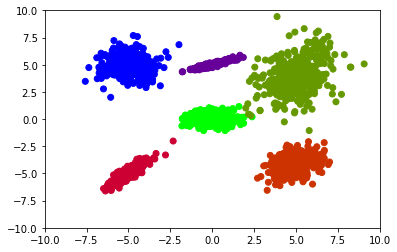

In [12]:
df = pd.read_csv('globular_distributions.csv')

plt.scatter(df.x, df.y, c=colorByNumericLabel(df,'label') )
plt.xlim(-10,10)
plt.ylim(-10,10)

In [13]:
message = str( len(set(df['label'])) ) + " clusters were found."
print(message)
message = "Homogeneity: " + str( metrics.homogeneity_score(df['label'], df['label']))
print(message)
message = "Completeness: " + str( metrics.completeness_score(df['label'], df['label']))
print(message)

6 clusters were found.
Homogeneity: 1.0
Completeness: 1.0


In [14]:
X = df[['x','y']]
mxiter,ninit,rnd_state = 300, 10, 0

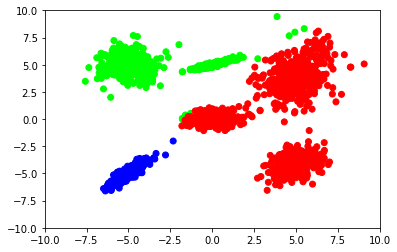

In [19]:
Clusters = 3
df = assumeXClustersKmeans(X,Clusters,mxiter,ninit,rnd_state)

In [20]:
fieldname = 'kmeans3'
message = str( len(set(df[fieldname])) ) + " clusters were found."
print(message)
message = "Homogeneity: " + str( metrics.homogeneity_score(df['label'], df[fieldname]))
print(message)
message = "Completeness: " + str( metrics.completeness_score(df['label'], df[fieldname]))
print(message)
message = "v_measure_score: " + str( metrics.v_measure_score(df['label'], df[fieldname]))
print(message)
message = "adjusted_rand_score: " + str( metrics.adjusted_rand_score(df['label'], df[fieldname]))
print(message)




3 clusters were found.
Homogeneity: 0.5547959459677718
Completeness: 0.9815674328460952
v_measure_score: 0.7089073326616726
adjusted_rand_score: 0.47433636643845956


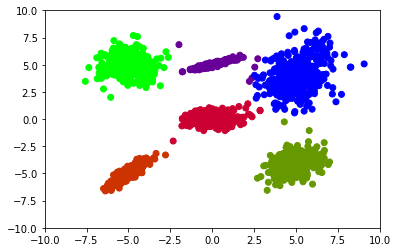

In [21]:
Clusters = 6
df = assumeXClustersKmeans(X,Clusters,mxiter,ninit,rnd_state)

In [22]:
fieldname = 'kmeans6'
message = str( len(set(df[fieldname])) ) + " clusters were found."
print(message)
message = "Homogeneity: " + str( metrics.homogeneity_score(df['label'], df[fieldname]))
print(message)
message = "Completeness: " + str( metrics.completeness_score(df['label'], df[fieldname]))
print(message)
message = "v_measure_score: " + str( metrics.v_measure_score(df['label'], df[fieldname]))
print(message)
message = "adjusted_rand_score: " + str( metrics.adjusted_rand_score(df['label'], df[fieldname]))
print(message)



6 clusters were found.
Homogeneity: 0.9844844930605722
Completeness: 0.984525676528632
v_measure_score: 0.984505084363909
adjusted_rand_score: 0.9888556861922394


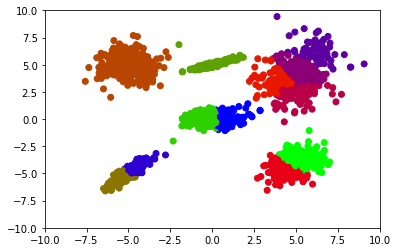

In [23]:
Clusters = 12
df = assumeXClustersKmeans(X,Clusters,mxiter,ninit,rnd_state)

In [24]:
fieldname = 'kmeans12'
message = str( len(set(df[fieldname])) ) + " clusters were found."
print(message)
message = "Homogeneity: " + str( metrics.homogeneity_score(df['label'], df[fieldname]))
print(message)
message = "Completeness: " + str( metrics.completeness_score(df['label'], df[fieldname]))
print(message)
message = "v_measure_score: " + str( metrics.v_measure_score(df['label'], df[fieldname]))
print(message)
message = "adjusted_rand_score: " + str( metrics.adjusted_rand_score(df['label'], df[fieldname]))
print(message)



12 clusters were found.
Homogeneity: 0.9914538918223196
Completeness: 0.7692943658188124
v_measure_score: 0.8663588217544033
adjusted_rand_score: 0.7701918560195766


In [25]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
df['dbscan'] = db.labels_

(-10, 10)

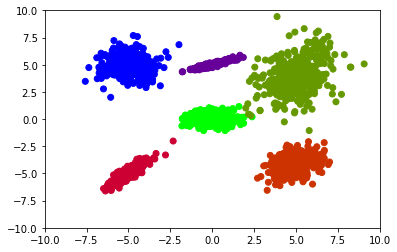

In [27]:
plt.scatter(df.x, df.y, c=colorByNumericLabel(df,'label') )
plt.xlim(-10,10)
plt.ylim(-10,10)

In [28]:
fieldname = 'dbscan'
message = str( len(set(df['dbscan'])) ) + " clusters were found."
print(message)
message = "Homogeneity: " + str( metrics.homogeneity_score(df['label'], df[fieldname]))
print(message)
message = "Completeness: " + str( metrics.completeness_score(df['label'], df[fieldname]))
print(message)
message = "v_measure_score: " + str( metrics.v_measure_score(df['label'], df[fieldname]))
print(message)
message = "adjusted_rand_score: " + str( metrics.adjusted_rand_score(df['label'], df[fieldname]))
print(message)


7 clusters were found.
Homogeneity: 0.9027725136310218
Completeness: 0.8357808325388439
v_measure_score: 0.8679859777647568
adjusted_rand_score: 0.8361590618547049


In [29]:
optics = OPTICS(min_samples=30, xi=.05, min_cluster_size=.01)
optics.fit(X)
df['optics'] = optics.labels_

(-10, 10)

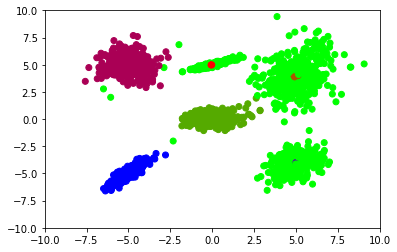

In [31]:
plt.scatter(df.x, df.y, c=colorByNumericLabel(df,'optics') )
plt.xlim(-10,10)
plt.ylim(-10,10)